In [10]:
%matplotlib inline
import seaborn
seaborn.set_style('whitegrid')


In [11]:
import numpy as np
import scipy.signal as signal
from scipy.signal import butter, lfilter, freqz
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (12.0, 8.0)

In [12]:
def butter_lowpass(cutoff, fs, order=5):
    nyq = 0.5 * fs
    normal_cutoff = cutoff / nyq
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    return b, a

def butter_lowpass_filter(data, cutoff, fs, order=5):
    """lowpass filter using butterworth
    notes this ones has a phase delay"""
    b, a = butter_lowpass(cutoff, fs, order=order)
    y = lfilter(b, a, data)
    return y

def butter_lowpass_filter2(data, cutoff, fs, order=5):
    """low-pass filter using butterworth but run with filtfilt to avoid phase delay"""
    b, a = butter_lowpass(cutoff, fs, order=order)
    y = signal.filtfilt(b, a, data)
    return y

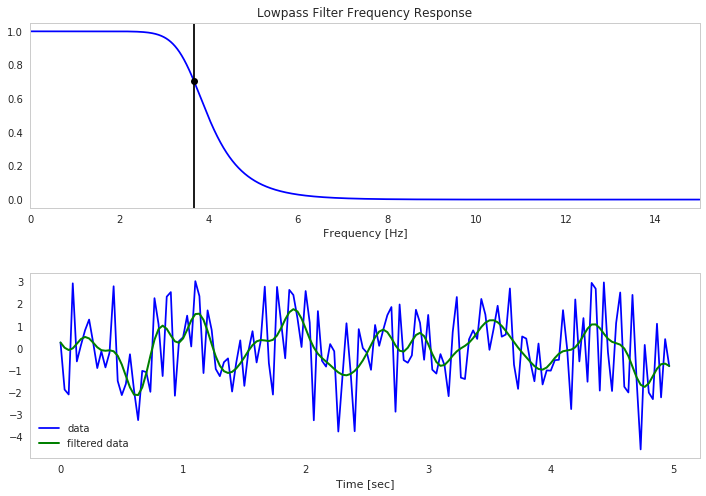

In [13]:
# Filter requirements.
order = 6
fs = 30.0       # sample rate, Hz
cutoff = 3.667  # desired cutoff frequency of the filter, Hz

# Get the filter coefficients so we can check its frequency response.
b, a = butter_lowpass(cutoff, fs, order)

# Plot the frequency response.
w, h = freqz(b, a, worN=8000)
plt.subplot(2, 1, 1)
plt.plot(0.5*fs*w/np.pi, np.abs(h), 'b')
plt.plot(cutoff, 0.5*np.sqrt(2), 'ko')
plt.axvline(cutoff, color='k')
plt.xlim(0, 0.5*fs)
plt.title("Lowpass Filter Frequency Response")
plt.xlabel('Frequency [Hz]')
plt.grid()


# Demonstrate the use of the filter.
# First make some data to be filtered.
T = 5.0         # seconds
n = int(T * fs) # total number of samples
t = np.linspace(0, T, n, endpoint=False)
# "Noisy" data.  We want to recover the 1.2 Hz signal from this.
# generate signals sinewave 2*pi*f where f is the frequency
data = np.sin(1.2*2*np.pi*t) + 1.5*np.cos(9*2*np.pi*t) + 0.5*np.sin(12.0*2*np.pi*t)
data = data + 0.9*np.random.normal(size=data.size)
# Filter the data, and plot both the original and filtered signals.
y = butter_lowpass_filter2(data, cutoff, fs, order)

plt.subplot(2, 1, 2)
plt.plot(t, data, 'b-', label='data')
plt.plot(t, y, 'g-', linewidth=2, label='filtered data')
plt.xlabel('Time [sec]')
plt.grid()
plt.legend()

plt.subplots_adjust(hspace=0.35)
plt.show()

Difference of filtered and original data, shows the left-over high frequency info



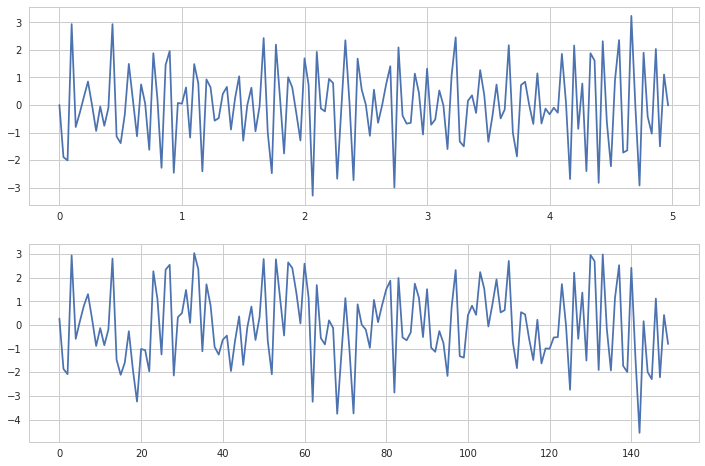

In [14]:
fig1 = plt.figure(1)
plt.subplot(2,1,1)
plt.plot(t, data-y, label='data-y')
plt.subplot(2,1,2)
plt.plot(data)

In [15]:
import resampy

ModuleNotFoundError: No module named 'resampy'

In [7]:
print(n,T, n/T)
f2 = 15

150 5.0 30.0


In [8]:
re_data = resampy.resample(data, n/5, f2)

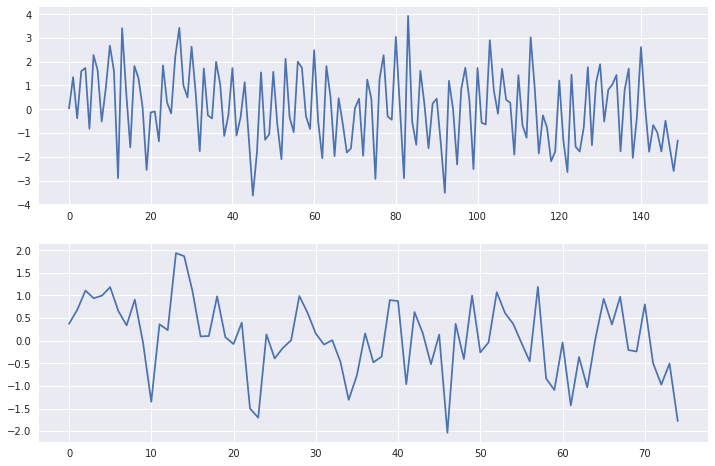

In [9]:
fig2 = plt.figure(1)
plt.subplot(2,1,1)
plt.plot(data)
plt.subplot(2,1,2)
plt.plot(re_data)

In [10]:
import scipy.signal

In [11]:
sci_data = scipy.signal.resample?

In [ ]:
sci_data = scipy.signal.resample

In [12]:
sci_data = scipy.signal.resample(data, int(f2*T))

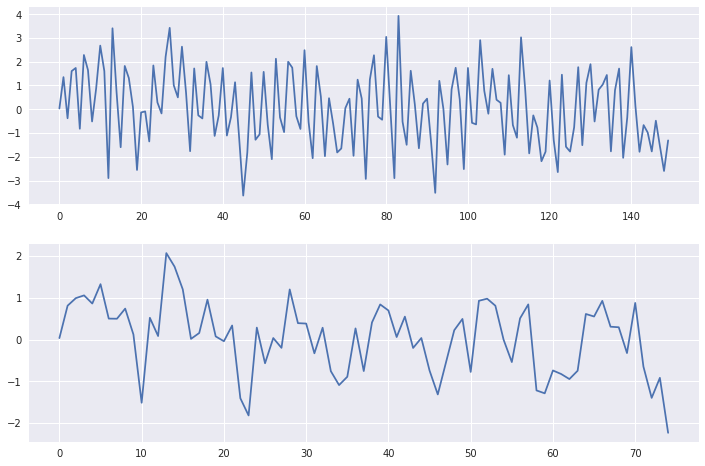

In [13]:
fig3 = plt.figure(1)
plt.subplot(2,1,1)
plt.plot(data)
plt.subplot(2,1,2)
plt.plot(sci_data)

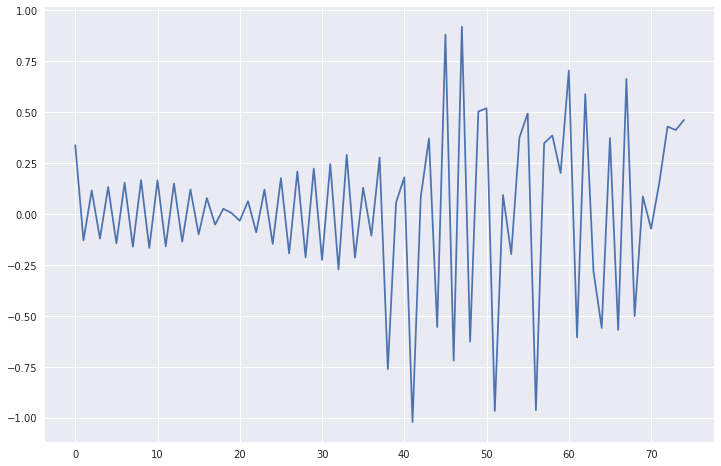

In [14]:
plt.plot(re_data-sci_data)